In [16]:
import adaptive_latents as al

import matplotlib.pyplot as plt
import numpy as np

In [17]:
A, beh = al.input_sources.hmm_simulation.simulate_example_data(n=5000)

In [18]:
t = al.profiling_functions.get_speed_by_time(A, beh, prosvd_k=4, bw_params=al.Bubblewrap.default_clock_parameters);

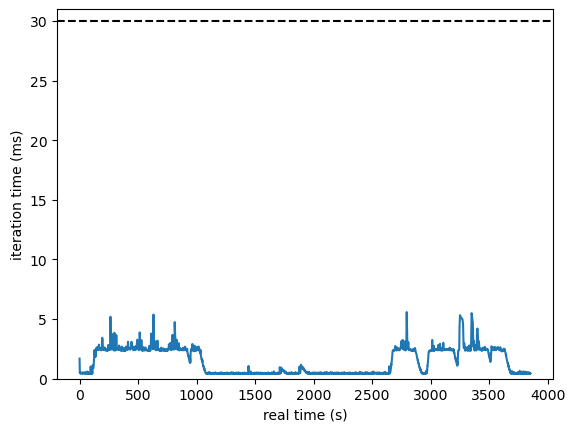

In [19]:

plt.plot((t[:-1] - t[0])*1000,np.diff(t)*1000)
plt.ylim([0, 31])
plt.axhline(30, color='k', linestyle='--')
plt.xlabel("real time (s)")
plt.ylabel("iteration time (ms)")

In [20]:
times_dict = al.profiling_functions.get_speed_per_step(A, beh, prosvd_k=4, bw_params=al.Bubblewrap.default_clock_parameters, max_steps=5000)

In [21]:
keys = list(times_dict.keys())
times = np.array([times_dict[k] for k in keys])*1000

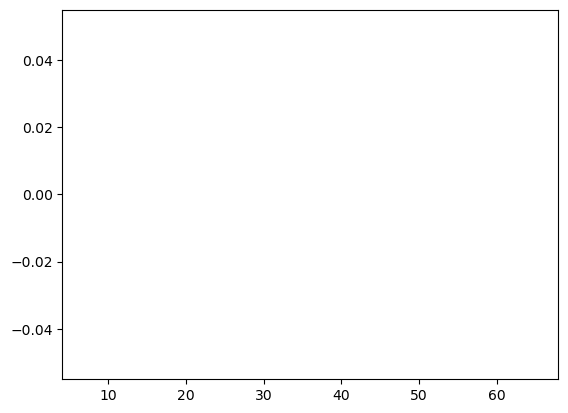

In [22]:
plt.hist(times.sum(axis=0), np.linspace(7,65,101));

Text(0, 0.5, 'iteration time (ms)')

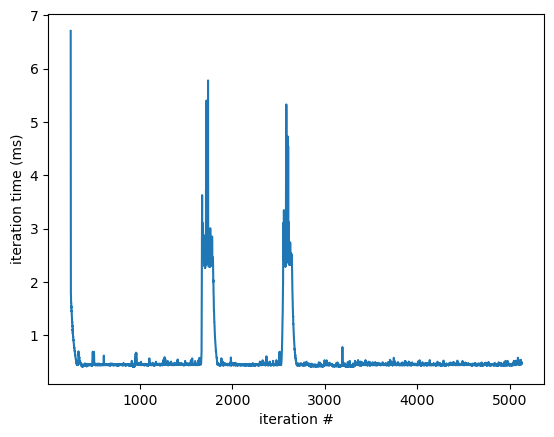

In [23]:
fig, ax = plt.subplots()
slice_start = 250
good_slice = times.sum(axis=0)[:]
ax.plot(np.arange(len(good_slice))+slice_start, good_slice)
ax.set_xlabel("iteration #");
ax.set_ylabel("iteration time (ms)")

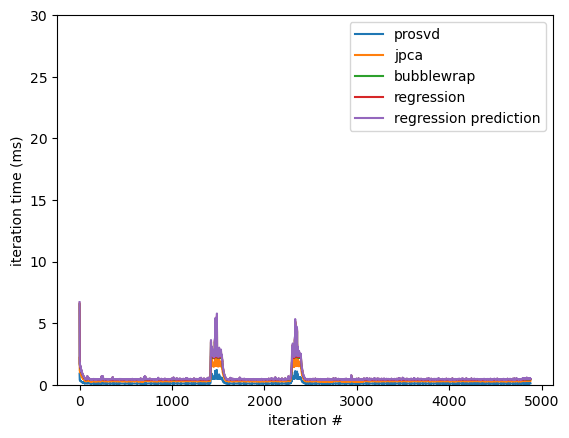

In [24]:
fig, ax = plt.subplots()
slice_start = 0
good_slice = times[:,:]
ax.plot(np.arange(good_slice.shape[1])+slice_start, np.cumsum(good_slice,0).T, label=keys)
ax.set_xlabel("iteration #");
ax.set_ylabel("iteration time (ms)")
ax.set_ylim([0,30])
ax.legend();